In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("Algerian_dataset_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df=df.drop(['month','day','year'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)
# df.head()

In [9]:
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
# Dependent & Independent features

X=df.drop('FWI',axis=1)
X


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [12]:
y=df['FWI']

In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
# feature Selection based on Corr
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

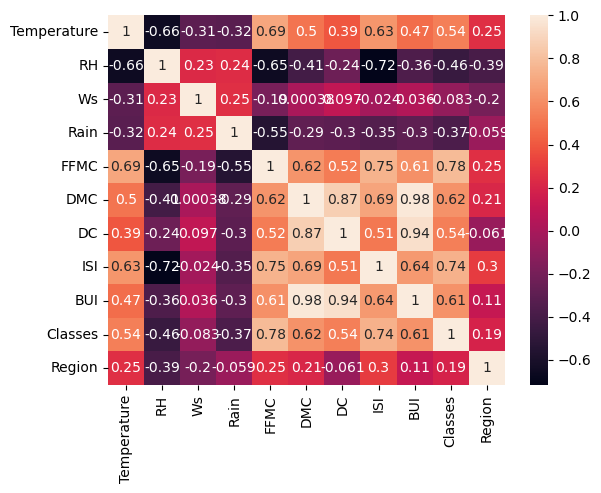

In [16]:
import seaborn as sns 
corr = X_train.corr()
sns.heatmap(corr, annot = True)

In [17]:
# multicolinearity - corr between independent features i.e input features
def cor(df , threshold):
    col_corr=set()
    corrm = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if(abs(corrm.iloc[i,j])>threshold):
                colname = corrm.columns[i]
                col_corr.add(colname)
    return col_corr


In [18]:
corf= cor(X_train,0.85)

In [19]:
X_train.drop(corf,axis=1,inplace=True)
X_test.drop(corf,axis=1,inplace=True)

In [20]:
X_train.shape

(182, 9)

In [21]:
# Feature Scaling / Standardization 
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)


In [23]:
X_trains

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

# Box plots to understand effect of Standard Scaler

Text(0.5, 1.0, 'X Train before training')

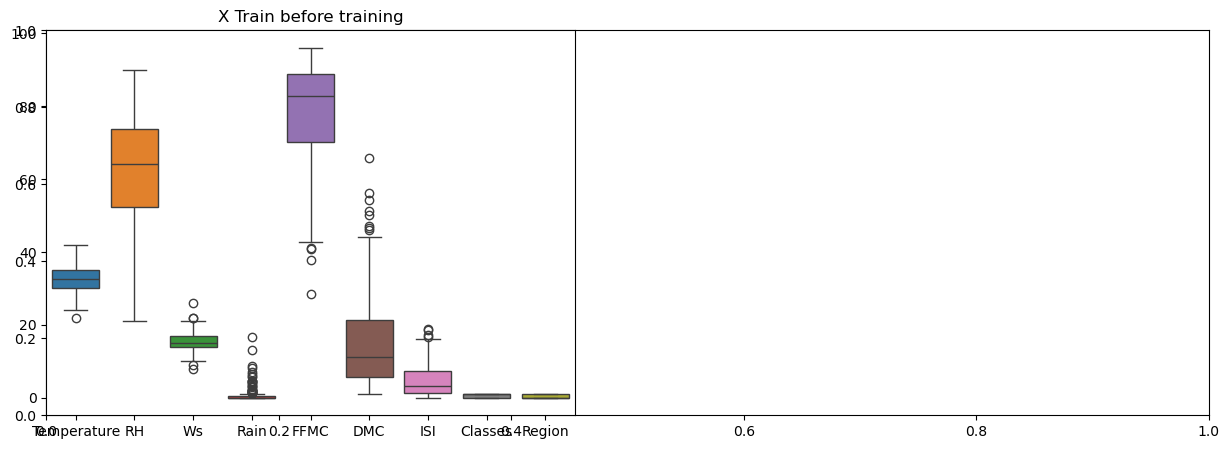

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X Train before training")

# plt.subplots(figsize=(15,5))
# plt.subplot(1,2,2)
# sns.boxplot(data=X_trains)
# plt.title("X Train after training")
# plt.subplot(1,2,2）
# sns.boxplot(data=X_trains)
# plt.title('X_train After Scaling')

<Axes: >

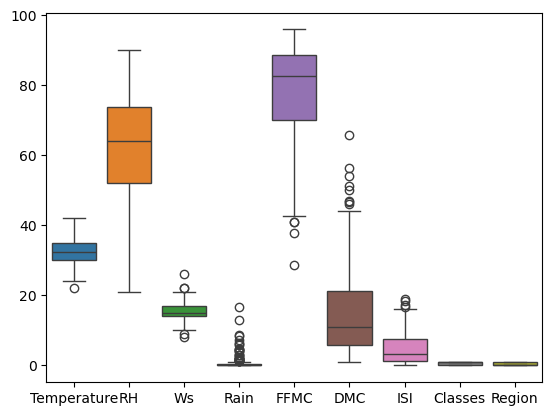

In [25]:
# plt.subplots(figsize=(12,7))
# plt.subplot(1,2,1)
sns.boxplot(X_train)
# plt.subplot(1,2,2)


<Axes: >

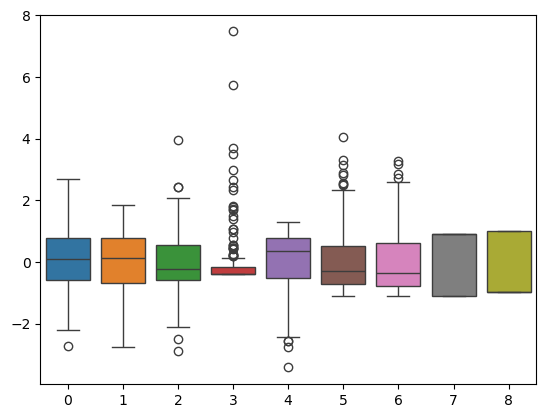

In [26]:
sns.boxplot(X_trains)

## Linear Regression 

In [27]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mae 0.546823646524999
R2 score  0.9847657384266951


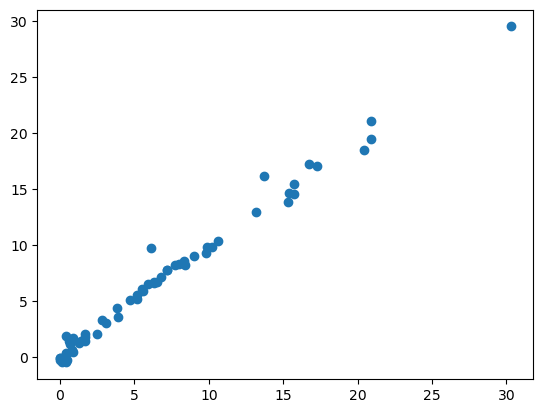

In [28]:
lreg= LinearRegression()
lreg.fit(X_trains,y_train)
y_pred=lreg.predict(X_tests)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print("Mae", mae)
print("R2 score ", score)
plt.scatter(y_test,y_pred)

In [29]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mae 1.1331759949144082
R2 score  0.9492020263112388


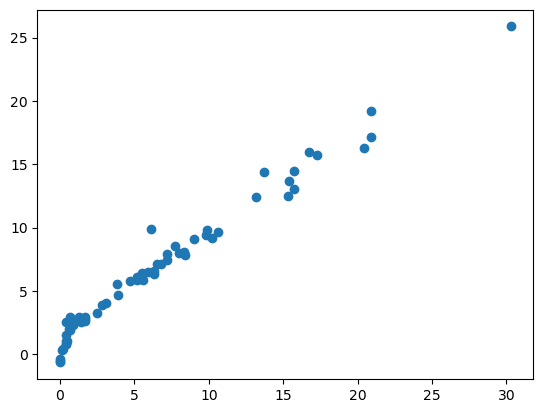

In [30]:
lasso= Lasso()
lasso.fit(X_trains,y_train)
y_pred=lasso.predict(X_tests)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print("Mae", mae)
print("R2 score ", score)
plt.scatter(y_test,y_pred)

In [31]:
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mae 0.5642305340105711
R2 score  0.9842993364555512


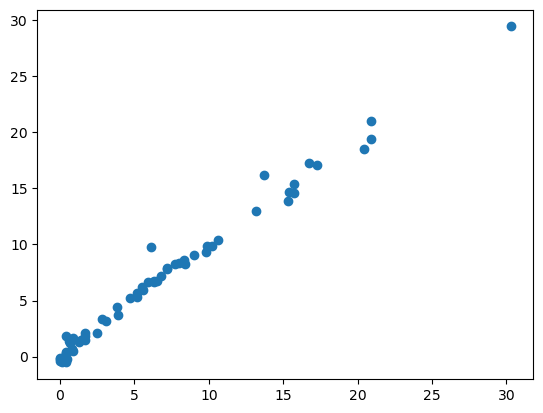

In [32]:
ridge= Ridge()
ridge.fit(X_trains,y_train)
y_pred=ridge.predict(X_tests)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print("Mae", mae)
print("R2 score ", score)
plt.scatter(y_test,y_pred)

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mae 1.8822353634896
R2 score  0.8753460589519703


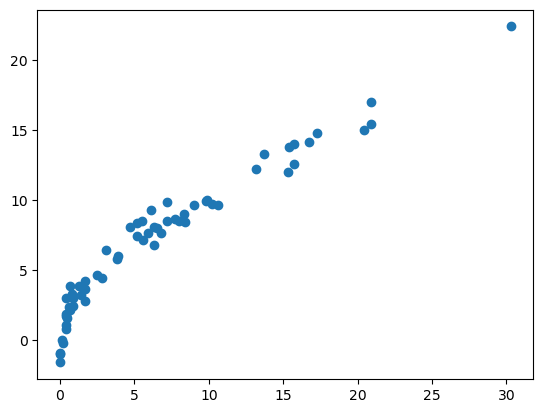

In [35]:
elasticnet= ElasticNet()
elasticnet.fit(X_trains,y_train)
y_pred=elasticnet.predict(X_tests)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print("Mae", mae)
print("R2 score ", score)
plt.scatter(y_test,y_pred)

# Cross - Validation 
hyper parameter tuning

In [60]:
from sklearn.linear_model import LassoCV
lassocv= LassoCV(cv=5)
lassocv.fit(X_trains,y_train)
lassocv.predict(X_tests)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [45]:
lassocv.alphas_

array([7.05853002e+00, 6.58280872e+00, 6.13914944e+00, 5.72539132e+00,
       5.33951911e+00, 4.97965339e+00, 4.64404142e+00, 4.33104857e+00,
       4.03915039e+00, 3.76692517e+00, 3.51304702e+00, 3.27627941e+00,
       3.05546914e+00, 2.84954075e+00, 2.65749124e+00, 2.47838523e+00,
       2.31135036e+00, 2.15557308e+00, 2.01029467e+00, 1.87480753e+00,
       1.74845178e+00, 1.63061198e+00, 1.52071419e+00, 1.41822315e+00,
       1.32263965e+00, 1.23349817e+00, 1.15036452e+00, 1.07283380e+00,
       1.00052839e+00, 9.33096128e-01, 8.70208572e-01, 8.11559427e-01,
       7.56863037e-01, 7.05853002e-01, 6.58280872e-01, 6.13914944e-01,
       5.72539132e-01, 5.33951911e-01, 4.97965339e-01, 4.64404142e-01,
       4.33104857e-01, 4.03915039e-01, 3.76692517e-01, 3.51304702e-01,
       3.27627941e-01, 3.05546914e-01, 2.84954075e-01, 2.65749124e-01,
       2.47838523e-01, 2.31135036e-01, 2.15557308e-01, 2.01029467e-01,
       1.87480753e-01, 1.74845178e-01, 1.63061198e-01, 1.52071419e-01,
      

Mean absolute error 1.8822353634896
R2 Score 0.9820946715928275


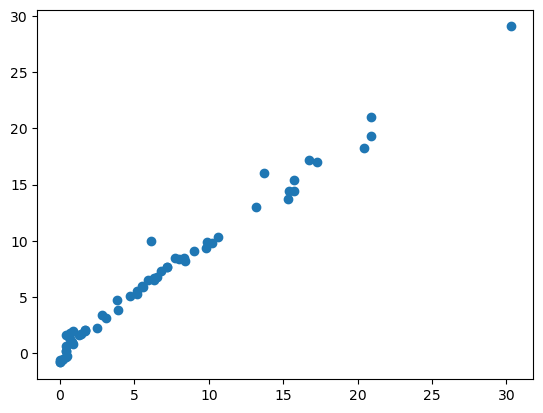

In [62]:
y_pred=lassocv.predict(X_tests)
plt.scatter(y_test,y_pred)
mse = mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print ("R2 Score", score)
# print(mae)